<div align="center">
<h1>Classificação de Feijões Secos</h1>
<img src="https://storage.googleapis.com/kaggle-datasets-images/2048855/3398802/f484410f3cfb3f7f49d1216f57f18850/dataset-cover.jpg" height="30%" width="30%" border="0"></img>

<p>Descrição: <i>
"Sete tipos diferentes de feijão seco foram utilizados nesta pesquisa, levando em consideração características como forma, formato, tipo e estrutura da situação do mercado. <br>Um sistema de visão computacional foi desenvolvido para distinguir sete diferentes variedades registradas de feijão seco com características semelhantes, a fim de obter uma classificação uniforme de sementes.<br> Para o modelo de classificação, foram obtidas imagens de 13.611 grãos de 7 feijões cadastrados diferentes com câmera de alta resolução.<br> As imagens de feijão obtidas por sistema de visão computacional foram submetidas às etapas de segmentação e extração de características, totalizando 16 características; 12 dimensões e 4 formatos foram obtidos a partir dos grãos."
<div align="center">
Fonte: 
<a href="https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset/data" align="left">Dry Bean Dataset</a>
</div>
</p></i>
</div>

In [1]:
# Importa bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Ignora quaisquer avisos que possam aparecer
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importa o arquivo no formato CSV e mostra as 5 primeiras linhas
data = pd.read_csv("Dry_Bean.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Verifica dimenções do dataset (13611 linhas, 17 colunas)
data.shape

(13611, 17)

In [5]:
# Algumas informações sobre os dados.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
# Ver algumas informações estatisticas sobre os dados 
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
# Ver quantidade de valores nulos
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
# Mostra frequancia dos valores unicos na coluna "Class" 
data["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [9]:
# Calcula a variancia das colunas(Exceto "Class")
data.iloc[:,0:-2].var().sort_values(ascending=False)

ConvexArea         8.865456e+08
Area               8.599026e+08
Perimeter          4.592007e+04
MajorAxisLength    7.343494e+03
EquivDiameter      3.501932e+03
MinorAxisLength    2.022309e+03
AspectRation       6.085026e-02
ShapeFactor3       9.800238e-03
Eccentricity       8.464324e-03
Compactness        3.808552e-03
roundness          3.542617e-03
Extent             2.409471e-03
Solidity           2.171913e-05
ShapeFactor1       1.272380e-06
ShapeFactor2       3.550668e-07
dtype: float64

In [10]:
# Função que cria uma matriz de correlação
from matplotlib import pyplot as plt
import seaborn as sns

def Correlation_Matrix(dataframe):
    mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))

    plt.subplots(figsize=(8, 6))

    sns.heatmap(dataframe.corr().abs(), mask=mask, cmap='mako', \
                square=True, annot=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": .5}, annot_kws={"size":8})
    plt.xticks(fontweight= 'bold')
    plt.yticks(fontweight= 'bold')
    plt.title('Correlation Matrix', fontdict={'fontsize': 25, 'fontweight' : 500}, pad=50)
    plt.show()

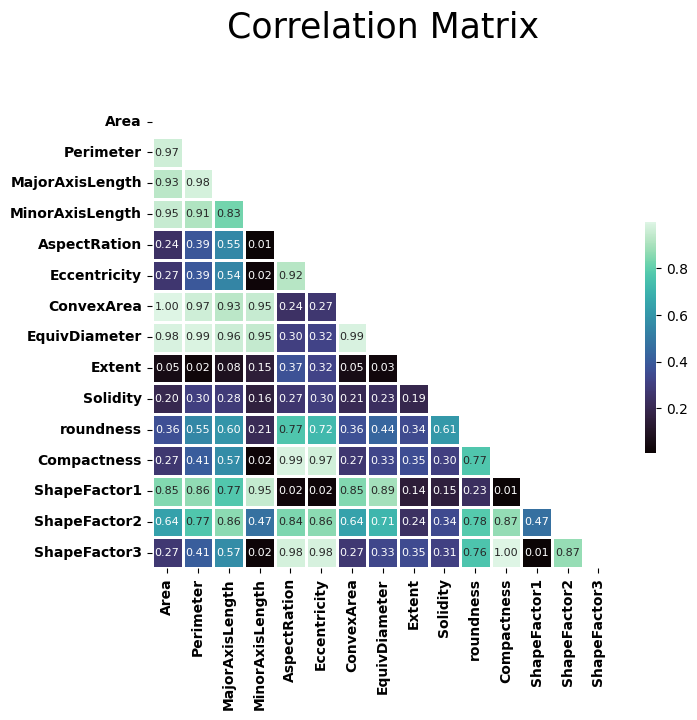

In [11]:
Correlation_Matrix(data.iloc[:,0:-2])

Como mostrado na Matriz de correlaçao acima, existe alguns colunas com uma correlaçao bem alta. o que pode significar que é possivel utilizar uma coluna para explicar a outra.<br>Por Exemplo as colunas ```MajorAxisLength``` e ```Perimeter``` tem uma correlaçao de 0.98, uma correlaçao quase perfeita.<br>Observe o grafico abaixo:

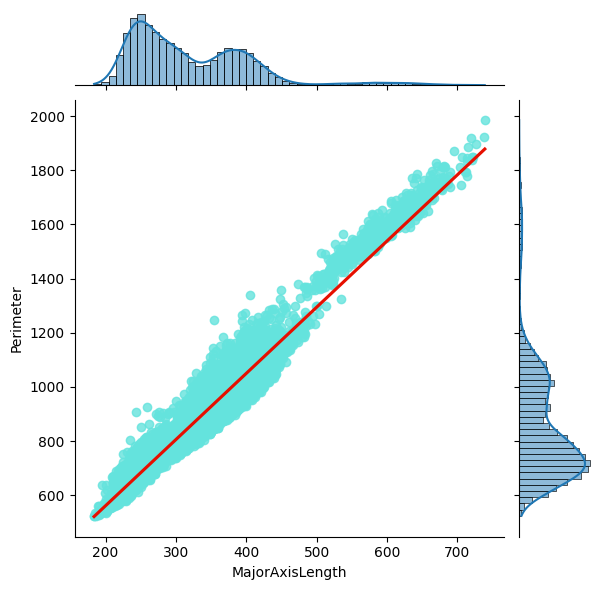

In [12]:
sns.jointplot(data=data, x = 'MajorAxisLength', y = 'Perimeter', kind="reg", joint_kws={'color':'#64E3DD', 'line_kws':{'color':'#E60F00'}})
plt.show()

Agora é possivel saber porque as duas colunas tem uma correlação alta, interpretando o grafico acima, quando os valores da coluna ```MajorAxisLength``` aumenta, o da coluna ```Perimeter``` tambem é aumentado e vice e versa.<br>
Lembrando que, correlação não implica casualidade. Significa que, em alguns casos, uma correlação forte entre duas variáveis não quer dizer que há uma relação de causa-efeito entre elas.

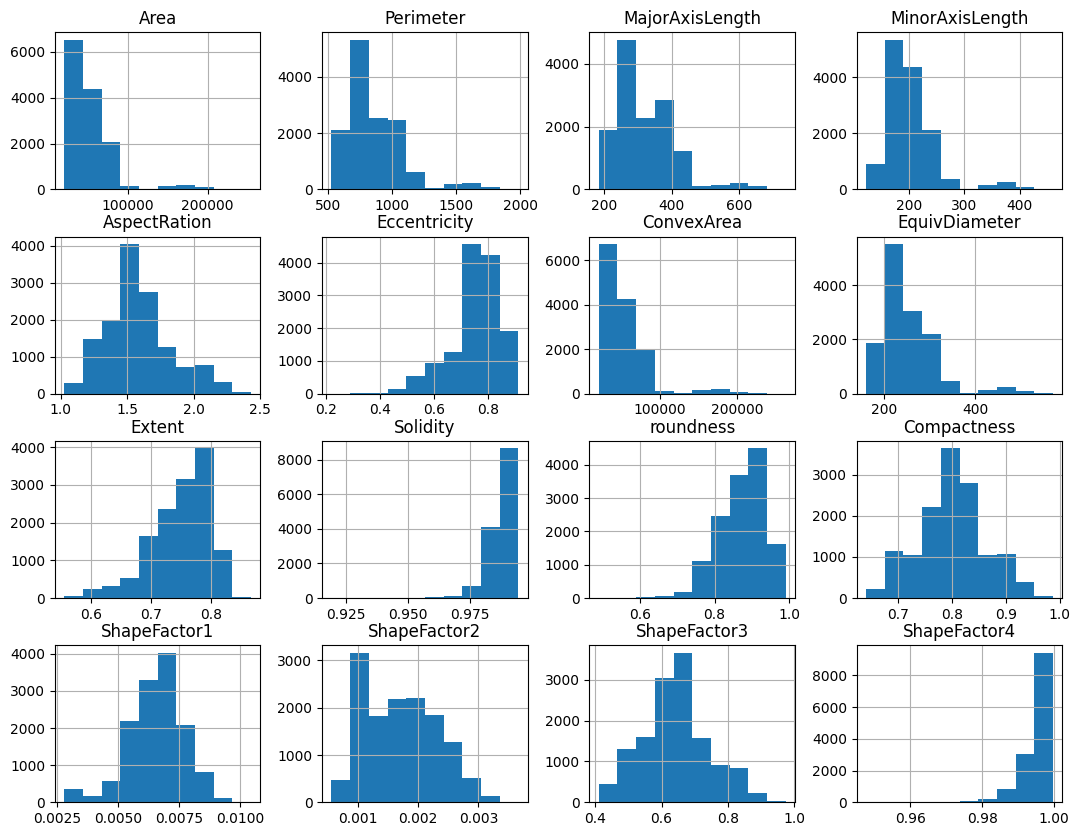

In [13]:
# Mostra distribuição dos dados de cada coluna
data.hist(figsize=(13, 10))
plt.show()

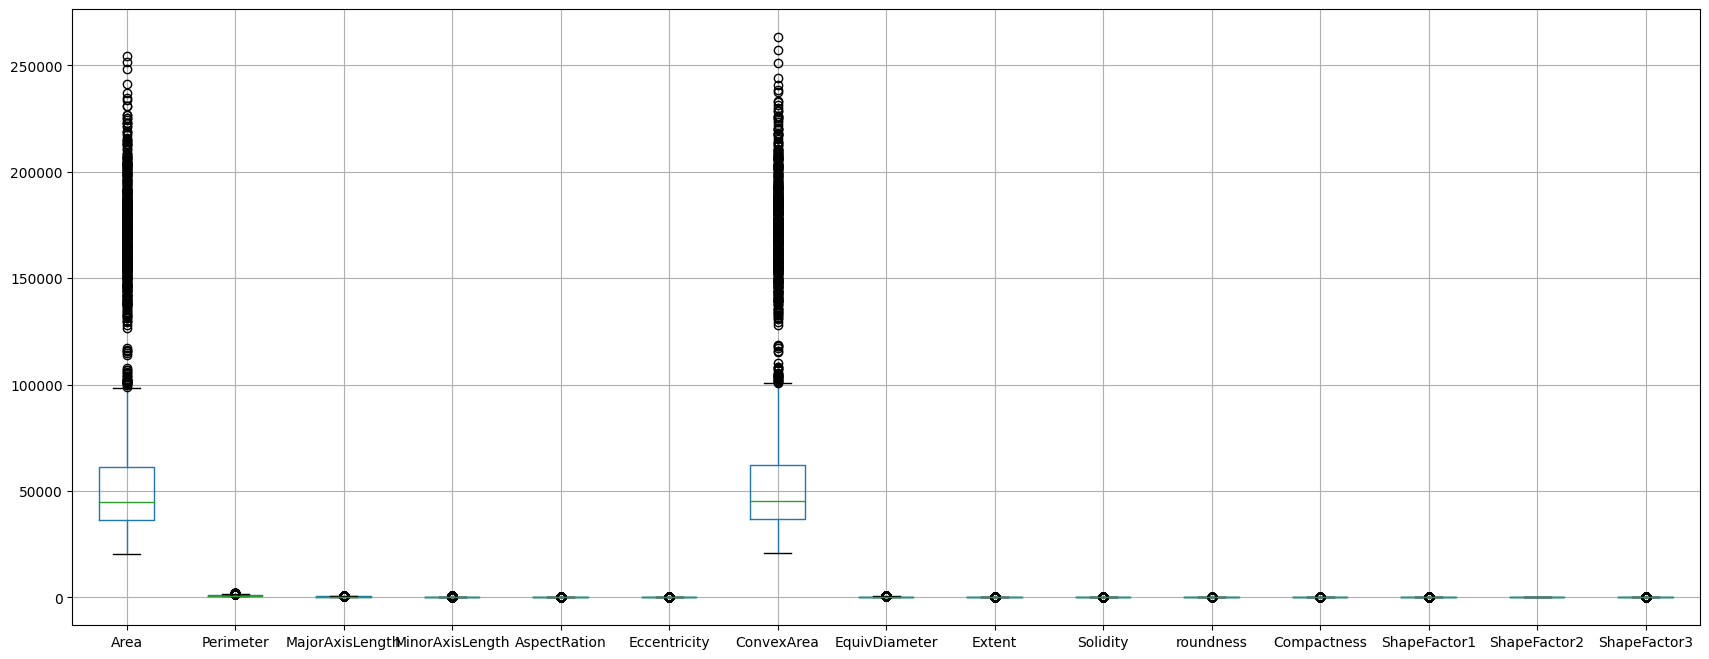

In [14]:
# Cria uma boxplot para mostrar informações estatisticas entre as colunas e suas escalas.
data.iloc[:,0:-2].boxplot(figsize=(21, 8))
plt.show()

Algo de interessante pode ser visto nesse grafico, as colunas ```Area``` e ```ConvexArea``` estão em uma escala totalmente de diferenta das outras, sera necessario um tratamento nas 2 colunas.

In [15]:
# Separa as variaveis(colunas) independentes e a variavel dependente
X = data.drop(["Class"], axis=1)
y = data["Class"]

In [16]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


Como visto anteriormente, existem colunas que tem uma correlação muito alta.<br> Abaixo é criado um codigo para remover uma entre duas colunas com correlação alta, pois as duas são reduntantes para o modelo, já que significam quase a mesma coisa.

In [17]:
# Cria uma mascara com as colunas com uma correlação maior que 0.95
corrX = X.corr().abs()
mask = np.triu(np.ones_like(corrX, dtype=bool))
tri_X = corrX.mask(mask)
to_drop = [c for c in tri_X.columns if any(tri_X[c] > 0.95)]
print(to_drop)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'Compactness']


In [18]:
# Remove as colunas indicadas pela mascara 
X_reduced = X.drop(to_drop, axis=1)
X_reduced.head()

,EquivDiameter,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,190.141097,0.763923,0.988856,0.958027,0.007332,0.003147,0.834222,0.998724
1,191.272751,0.783968,0.984986,0.887034,0.006979,0.003564,0.909851,0.998430
2,193.410904,0.778113,0.989559,0.947849,0.007244,0.003048,0.825871,0.999066
3,195.467062,0.782681,0.976696,0.903936,0.007017,0.003215,0.861794,0.994199
4,195.896503,0.773098,0.990893,0.984877,0.006697,0.003665,0.941900,0.999166


In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

scaler = StandardScaler() # É utilizado para padronizar os valores, deixando as colunas na mesma escala
lb = LabelEncoder()  # É utilizado para rotular os valores categoricos, os colocando no formato numerico

# Separa dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, stratify=y, train_size= .7)
print(X_train.shape)
print(X_test.shape)

(9527, 8)
(4084, 8)


In [27]:
X_train.var().sort_values(ascending=False) # Verifica a variancia dos valores nas colunas

EquivDiameter    3.467857e+03
ShapeFactor3     9.815649e-03
roundness        3.545091e-03
Extent           2.396725e-03
Solidity         2.228769e-05
ShapeFactor4     1.932644e-05
ShapeFactor1     1.262517e-06
ShapeFactor2     3.550570e-07
dtype: float64

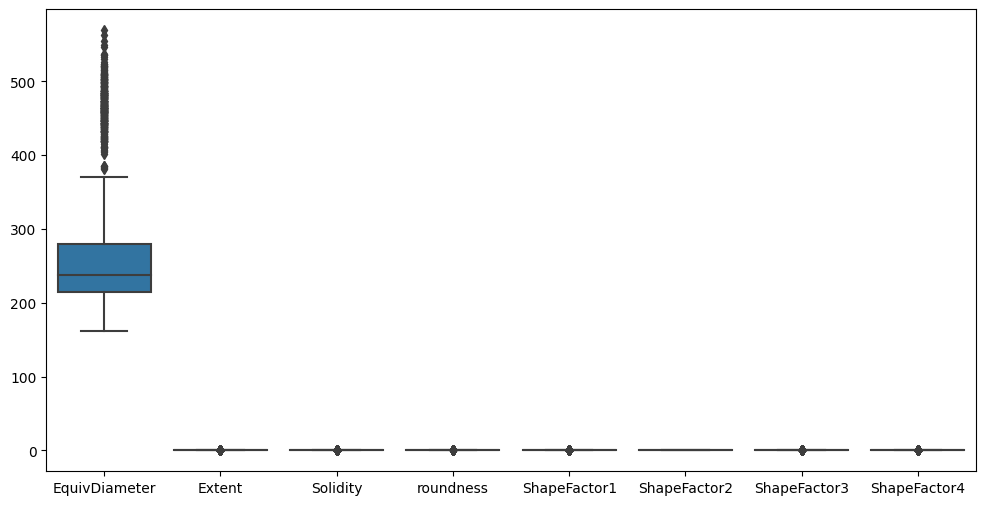

In [21]:
plt.subplots(figsize=(12, 6))
sns.boxplot(X_train)
plt.show()

Ao observar a variancia das colunas e o grafico acima, pode-se concluir que algumas colunas tem uma variancia muito maior em comparação as outras, significando uma diferença de escala entre seus valores.<br>
Isso pode fazer com que o modelo dê mas importancia a colunas com alta variancia e ignorando a colunas com baixa variancia, para resolver esse problema os dados devem ser padronizados para que o modelo trate todas as colunas igualmente.

In [22]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.transform(y_test)

In [26]:
pd.DataFrame(X_train_std, columns=X_reduced.columns).var().sort_values(ascending=False)

roundness        1.000105
ShapeFactor2     1.000105
ShapeFactor3     1.000105
EquivDiameter    1.000105
Extent           1.000105
Solidity         1.000105
ShapeFactor1     1.000105
ShapeFactor4     1.000105
dtype: float64

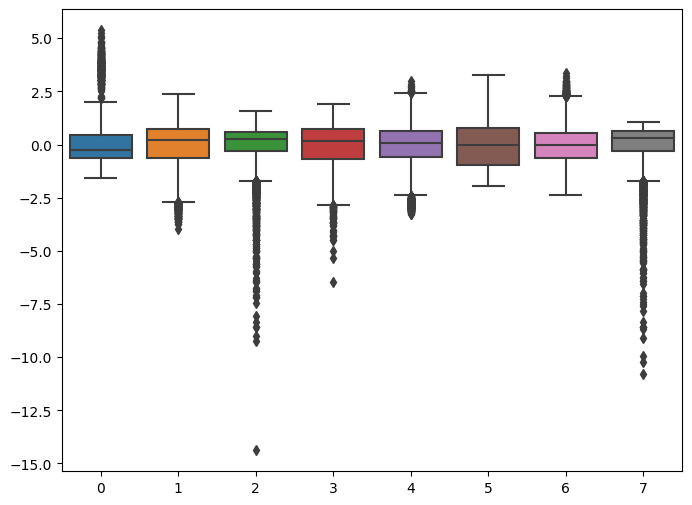

In [28]:
plt.subplots(figsize=(8, 6))
sns.boxplot(X_train_std)
plt.show()

Após a padronização dos dados, os as colunas ficaram na mesma escala como mostrado no grafico acima.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score, RepeatedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Instancia os modelos de classificação que serão utlizados
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

Para verificar se é possivel alcançar um bom resultado com poucas colunas, é utilizado o RFE(Recursive Feature Elimination) para seleção das colunas

In [34]:
rfe = RFE(estimator=lr, n_features_to_select=6, verbose=1) # o melhor resultado encontrado foi o com 6 colunas, reduzindo a quantidade de colunas de 8 para 6
rfe.fit(X_train_std, y_train_lb)
print(dict(zip(X.columns, rfe.ranking_)))

Fitting estimator with 8 features.
Fitting estimator with 7 features.
{'Area': 1, 'Perimeter': 3, 'MajorAxisLength': 2, 'MinorAxisLength': 1, 'AspectRation': 1, 'Eccentricity': 1, 'ConvexArea': 1, 'EquivDiameter': 1}


As colunas que tem menos importancia para o modelo de regressão logistica são ```Perimeter``` e ```MajorAxisLength```, então elas serão removidas do dataset.

In [35]:
# Remove as duas colunas
X_test_reduced = np.delete(X_test_std, [1,2], axis=1)
X_train_reduced = np.delete(X_train_std, [1,2], axis=1)

In [36]:
# define uma estratégia de validação cruzada que sera usada para avaliar o desempenho dos modelos
# Foi definido que os dados serão divididos em 5 pedaços(quatro para treino e uma para teste), esse processo irá se repetir cinco vezes.
repkfold = RepeatedKFold( n_splits=5, n_repeats=5, random_state=14)

In [37]:
# Utiliza validação cruzada para calcular o desempenho dos modelos
print(f"Logistic Regression: {cross_val_score(lr, X_train_reduced, y_train_lb, cv = repkfold).mean()}")
print(f"        KNN        : {cross_val_score(knn, X_train_reduced, y_train_lb, cv = repkfold).mean()}")
print(f"   Random Forest   : {cross_val_score(rf, X_train_reduced, y_train_lb, cv = repkfold).mean()}")

Logistic Regression: 0.9187570016497151
        KNN        : 0.917875189001165
   Random Forest   : 0.9203945655796174


In [38]:
# Treina os modelos com os dados de treino
knn.fit(X_train_reduced, y_train_lb)
rf.fit(X_train_reduced, y_train_lb)
lr.fit(X_train_reduced, y_train_lb)

LogisticRegression(max_iter=1000)

In [39]:
# Calcula o algumas metricas para avaliar o modelo
print("Treino = " + str(accuracy_score(y_train_lb, knn.predict(X_train_reduced))))
print("Teste = " + str(accuracy_score(y_test_lb, knn.predict(X_test_reduced))))
print(classification_report(y_test_lb, knn.predict(X_test_reduced)))

Treino = 0.9403799727091424
Teste = 0.9245837414299706
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       397
           1       1.00      1.00      1.00       157
           2       0.90      0.94      0.92       489
           3       0.91      0.93      0.92      1064
           4       0.95      0.94      0.95       578
           5       0.96      0.95      0.95       608
           6       0.89      0.87      0.88       791

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [42]:
print("Treino = " + str(accuracy_score(y_train_lb, lr.predict(X_train_reduced))))
print("Teste = " + str(accuracy_score(y_test_lb, lr.predict(X_test_reduced))))
print(classification_report(y_test_lb, lr.predict(X_test_reduced)))

Treino = 0.9193870053532067
Teste = 0.9231145935357493
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       397
           1       1.00      1.00      1.00       157
           2       0.92      0.94      0.93       489
           3       0.92      0.92      0.92      1064
           4       0.96      0.94      0.95       578
           5       0.94      0.95      0.94       608
           6       0.87      0.88      0.87       791

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [43]:
# Utilizando os hiperparametros padrão, o modelo Random Forest pode estar sofrendo de overfitting
print("Treino = " + str(accuracy_score(y_train_lb, rf.predict(X_train_reduced))))
print("Teste = " + str(accuracy_score(y_test_lb, rf.predict(X_test_reduced))))
print(classification_report(y_test_lb, rf.predict(X_test_reduced)))

Treino = 1.0
Teste = 0.9255631733594515


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       397
           1       0.99      1.00      1.00       157
           2       0.92      0.94      0.93       489
           3       0.92      0.93      0.92      1064
           4       0.96      0.94      0.95       578
           5       0.94      0.96      0.95       608
           6       0.88      0.87      0.88       791

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



Analisando as metricas dos 3 modelos, é possivel ver que os modelos conseguiram identificar a classe  ```1``` corretamente (```Recall```), e quando eles identificaram a classe ```1``` em todas as vezes de eles estavam certos (```Precision```), exceto o Random Forest.<br>
É importante observar que a quantidade de amostras da classe  ```1``` é bem baixa (```Support```) nos dados de teste, pode acontecer que quando o modelo estiver em produção seu desempenho pode variar, pois as metricas são somente estimativas.

<!-- from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': np.arange(50, 200, 10),  # Número de árvores na floresta
    'max_depth': [None] + list(np.arange(5, 30, 5)),  # Profundidade máxima da árvore (None para ilimitada)
    'min_samples_split': np.arange(2, 11),  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': np.arange(1, 11),  # Número mínimo de amostras necessárias em um nó folha
    'max_features': ['auto', 'sqrt', 'log2']  # Número de recursos a serem considerados em cada divisão
}

# Criar o modelo Random Forest
rf = RandomForestClassifier()

# Criar o objeto de busca aleatória
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=30, cv=3, random_state=42, scoring="accuracy")

# Executar a busca aleatória
random_search.fit(X_train_std_n, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)
print("\nMelhor resultado:")
print(random_search.best_score_) -->